# Predicting 30-Day Readmission for Patients

# by: Chris Videtto

## Data set from UCI Machine Learning Repository 
## Submitted on behalf of the Center for Clinical and Translational Research 
## Virginia Commonwealth University

### Importing the neccessary packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#linear algebra
import numpy as np

#data processing
import pandas as pd

#splitting data
from sklearn.model_selection import train_test_split

#scaling
from sklearn.preprocessing import StandardScaler

#tuning
from sklearn.model_selection import RandomizedSearchCV

#model evaluation
from sklearn import metrics

### EDA of the raw data set

In [17]:
#importing data
file = r"C:\Users\chris\OneDrive\Desktop\550 analysis\DiabetesProject\MODdiabetesSMOTE100k.csv"
df = pd.read_csv(file)

In [18]:
df.head(5)

,age,num_medications,number_emergency,number_inpatient,diabetes_DRGs,number_diagnoses,max_glu_serum,A1Cresult,metformin,insulin,readmitted
0,5,1,0,0,0,1,0,0,0,0,0
1,15,18,0,0,0,9,0,0,0,3,0
2,25,13,0,1,0,6,0,0,0,0,0
3,35,16,0,0,0,7,0,0,0,3,0
4,45,8,0,0,0,5,0,0,0,2,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85845 entries, 0 to 85844
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               85845 non-null  int64 
 1   num_medications   85845 non-null  int64 
 2   number_emergency  85845 non-null  int64 
 3   number_inpatient  85845 non-null  int64 
 4   diabetes_DRGs     85845 non-null  object
 5   number_diagnoses  85845 non-null  int64 
 6   max_glu_serum     85845 non-null  int64 
 7   A1Cresult         85845 non-null  int64 
 8   metformin         85845 non-null  int64 
 9   insulin           85845 non-null  int64 
 10  readmitted        85845 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 7.2+ MB


In [ ]:
### Visualizing the data

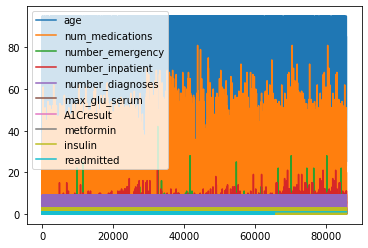

In [13]:
df.plot()

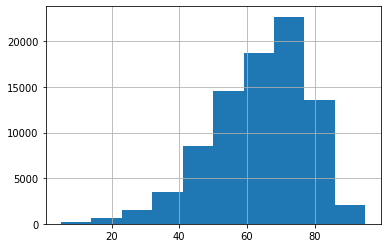

In [15]:
df['age'].hist()

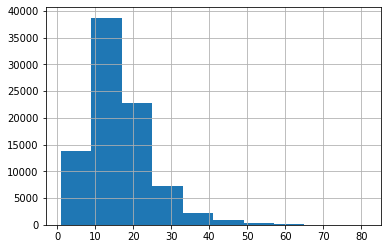

In [16]:
df['num_medications'].hist()

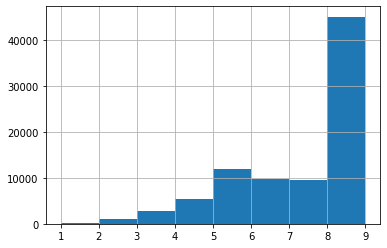

In [20]:
df['number_diagnoses'].hist(bins=8)

### Splitting data for train/test

In [6]:
X = df.drop(['readmitted'], axis = 1)
y = df.pop('readmitted')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [8]:
## Scaling data
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Predictive Modeling

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


LDA = LinearDiscriminantAnalysis(solver='svd')

# fit the model
LDA.fit(X_train, y_train)

y_predict_LDA = LDA.predict(X_test)

# model score
predict_train_LDA = LDA.predict(X_train)
predict_test_LDA = LDA.predict(X_test)

# accuracy score
LDA_train_score = LDA.score(X_train,y_train)
LDA_test_score = LDA.score(X_test,y_test)

# f1-score
LDA_f1_score = metrics.f1_score(y_test,predict_test_LDA)
LDA_recall = metrics.recall_score(y_test, predict_test_LDA)

print('Accuracy on Train set',LDA_train_score)
print('Accuracy on Test set',LDA_test_score)
print('F1-score on Test set:',LDA_f1_score)
print(metrics.classification_report(y_test, predict_test_LDA))

Accuracy on Train set 0.8087849276983055
Accuracy on Test set 0.8074736744012674
F1-score on Test set: 0.5797396257119609
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     14523
           1       0.99      0.41      0.58      6939

    accuracy                           0.81     21462
   macro avg       0.88      0.70      0.73     21462
weighted avg       0.85      0.81      0.78     21462



In [50]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()

# fit the model
NB_model.fit(X_train, y_train)

y_predict_NB = NB_model.predict(X_test)

# model score
predict_train_NB = NB_model.predict(X_train)
predict_test_NB = NB_model.predict(X_test)

# accuracy score
NB_train_score = NB_model.score(X_train,y_train)
NB_test_score = NB_model.score(X_test,y_test)

# f1-score
NB_f1_score = metrics.f1_score(y_test,predict_test_NB)
NB_recall = metrics.recall_score(y_test, predict_test_NB)

print('Accuracy on Train set',NB_train_score)
print('Accuracy on Test set',NB_test_score)
print('F1-score on Test set:',NB_f1_score)
print(metrics.classification_report(y_test, predict_test_NB))

Accuracy on Train set 0.8287392828344332
Accuracy on Test set 0.8272610584518167
F1-score on Test set: 0.5774664895544017
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     14480
           1       0.95      0.41      0.58      5776

    accuracy                           0.83     20256
   macro avg       0.88      0.70      0.73     20256
weighted avg       0.85      0.83      0.80     20256



In [52]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(max_iter=2000)

# fit the model
LR_model.fit(X_train, y_train)

y_predict_LR = LR_model.predict(X_test)

# model score
predict_train_LR = LR_model.predict(X_train)
predict_test_LR = LR_model.predict(X_test)

# accuracy score
LR_train_score = LR_model.score(X_train,y_train)
LR_test_score = LR_model.score(X_test,y_test)

# f1-score
LR_f1_score = metrics.f1_score(y_test,predict_test_LR)
LR_recall = metrics.recall_score(y_test,predict_test_LR)

print('Accuracy on Train set',LR_train_score)
print('Accuracy on Test set',LR_test_score)
print('F1-score on Test set:',LR_f1_score)
print(metrics.classification_report(y_test, predict_test_LR))

Accuracy on Train set 0.8301216120591769
Accuracy on Test set 0.8294332543443917
F1-score on Test set: 0.5835844281065444
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     14480
           1       0.96      0.42      0.58      5776

    accuracy                           0.83     20256
   macro avg       0.89      0.71      0.74     20256
weighted avg       0.85      0.83      0.80     20256



In [53]:
from sklearn.tree import DecisionTreeClassifier

DT_model= DecisionTreeClassifier()

# fit the model
DT_model.fit(X_train,y_train)

# model score
predict_train_DT = DT_model.predict(X_train)
predict_test_DT = DT_model.predict(X_test)

# accuracy score
DT_train_score = DT_model.score(X_train,y_train)
DT_test_score = DT_model.score(X_test,y_test)

# f1-score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT)

print('Accuracy on Train set',DT_train_score)
print('Accuracy on Test set',DT_test_score)
print('F1-score on Test set:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))

Accuracy on Train set 0.9121891816281863
Accuracy on Test set 0.8541666666666666
F1-score on Test set: 0.7293880542323197


              precision    recall  f1-score   support

           0       0.88      0.92      0.90     14480
           1       0.77      0.69      0.73      5776

    accuracy                           0.85     20256
   macro avg       0.83      0.80      0.81     20256
weighted avg       0.85      0.85      0.85     20256



In [10]:
from sklearn.ensemble import RandomForestClassifier

# create object model
RF_model = RandomForestClassifier()

# fit the model
RF_model.fit(X_train,y_train)

# model score
predict_train_RF = RF_model.predict(X_train)
predict_test_RF = RF_model.predict(X_test)

# accuracy score
RF_train_score = RF_model.score(X_train,y_train)
RF_test_score = RF_model.score(X_test,y_test)

# f1-score
RF_f1_score = metrics.f1_score(y_test,predict_test_RF)

print('Accuracy on Train set',RF_train_score)
print('Accuracy on Test set',RF_test_score)
print('F1-score on Test set:',RF_f1_score)
print(metrics.classification_report(y_test,predict_test_RF))

Accuracy on Train set 0.9056583259556094
Accuracy on Test set 0.8697232317584568
F1-score on Test set: 0.7861077111383109
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     14523
           1       0.84      0.74      0.79      6939

    accuracy                           0.87     21462
   macro avg       0.86      0.84      0.85     21462
weighted avg       0.87      0.87      0.87     21462



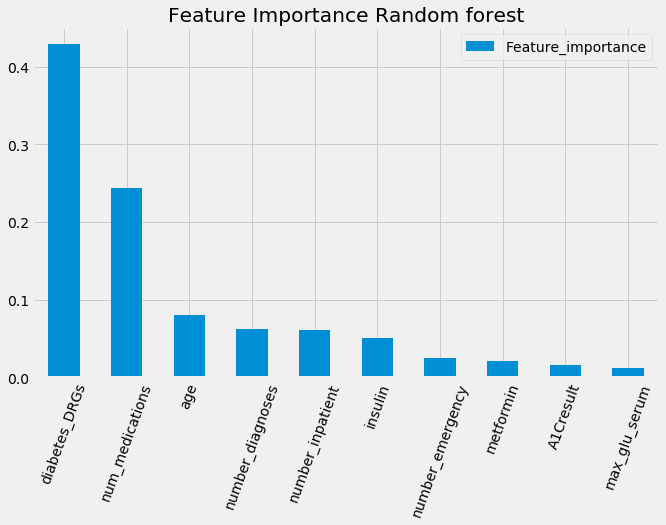

In [54]:
feature_score = pd.DataFrame(RF_model.feature_importances_, index =df.columns,  columns=['Feature_importance']).sort_values('Feature_importance', ascending=False)

plt.rcParams.update({'font.size': 22})
plt.style.use('fivethirtyeight')
feature_score.plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=70);
plt.title('Feature Importance Random forest');

In [9]:
from scipy.stats import pearsonr
num_medications = df['num_medications']
age = df['age']
corr, _ = pearsonr(num_medications, age)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.030


In [12]:
from scipy.stats import pearsonr
num_medications = df['number_diagnoses']
age = df['num_medications']
corr, _ = pearsonr(num_medications, age)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.251


In [14]:
import scipy.stats as stats

stats.f_oneway(df['readmitted'][df['diabetes_DRGs'] == 1],
               df['readmitted'][df['diabetes_DRGs'] == 0])

F_onewayResult(statistic=39462.70507005005, pvalue=0.0)

In [ ]:
stats.f_oneway(df['readmitted'][df['num_medications'] == 1],
               df['readmitted'][df['diabetes_DRGs'] == 0])